<a href="https://colab.research.google.com/github/ncdeenali/Supermarket-Data-Analysis/blob/main/AmazingMart_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [ ]:
# Initializing df
df1 = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/AmazingMart.xlsx', sheet_name = 1)

In [ ]:
# 2nd sheet
df1.head()

,Order ID,Product Name,Discount,Sales,Profit,Quantity,Category,Sub-Category
0,BN-2011-7407039,"Enermax Note Cards, Premium",0.5,45,-26,3,Office Supplies,Paper
1,AZ-2011-9050313,"Dania Corner Shelving, Traditional",0.0,854,290,7,Furniture,Bookcases
2,AZ-2011-6674300,"Binney & Smith Sketch Pad, Easy-Erase",0.0,140,21,3,Office Supplies,Art
3,BN-2011-2819714,"Boston Markers, Easy-Erase",0.5,27,-22,2,Office Supplies,Art
4,BN-2011-2819714,"Eldon Folders, Single Width",0.5,17,-1,2,Office Supplies,Storage


In [ ]:
# Info, data types.
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8047 entries, 0 to 8046
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Order ID      8047 non-null   object 
 1   Product Name  8047 non-null   object 
 2   Discount      8047 non-null   float64
 3   Sales         8047 non-null   int64  
 4   Profit        8047 non-null   int64  
 5   Quantity      8047 non-null   int64  
 6   Category      8047 non-null   object 
 7   Sub-Category  8047 non-null   object 
dtypes: float64(1), int64(3), object(4)
memory usage: 503.1+ KB


In [ ]:
# some statistical measures

df1.describe()
# max sales: > 6k, 75th: 313.
# max profit: ~ 2.5k, 75th: 47.

,Discount,Sales,Profit,Quantity
count,8047.000000,8047.000000,8047.000000,8047.000000
mean,0.110047,291.845657,35.198211,3.772089
std,0.181773,485.212156,178.125844,2.203369
min,0.000000,3.000000,-3060.000000,1.000000
25%,0.000000,48.000000,1.000000,2.000000
50%,0.000000,117.000000,14.000000,3.000000
75%,0.100000,313.000000,47.000000,5.000000
max,0.850000,6517.000000,2476.000000,14.000000


In [ ]:
# from here on i'm working on sheet 1 (2nd sheet) only
# so i don't get confused.

In [ ]:
df1.describe()

,Discount,Sales,Profit,Quantity,salary_zscores,profit_zscore
count,8047.000000,8047.000000,8047.000000,8047.000000,8.047000e+03,8.047000e+03
mean,0.110047,291.845657,35.198211,3.772089,-5.827740e-17,-1.721832e-17
std,0.181773,485.212156,178.125844,2.203369,1.000062e+00,1.000062e+00
min,0.000000,3.000000,-3060.000000,1.000000,-5.953346e-01,-1.737755e+01
25%,0.000000,48.000000,1.000000,2.000000,-5.025859e-01,-1.920010e-01
50%,0.000000,117.000000,14.000000,3.000000,-3.603713e-01,-1.190143e-01
75%,0.100000,313.000000,47.000000,5.000000,4.360084e-02,6.625946e-02
max,0.850000,6517.000000,2476.000000,14.000000,1.283055e+01,1.370353e+01


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8047 entries, 0 to 8046
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Order ID      8047 non-null   object 
 1   Product Name  8047 non-null   object 
 2   Discount      8047 non-null   float64
 3   Sales         8047 non-null   int64  
 4   Profit        8047 non-null   int64  
 5   Quantity      8047 non-null   int64  
 6   Category      8047 non-null   object 
 7   Sub-Category  8047 non-null   object 
dtypes: float64(1), int64(3), object(4)
memory usage: 503.1+ KB


In [ ]:
# FREQUENCY of Categorical columns.
# total count for each thing in each column.

product_freq = df1['Product Name'].value_counts().sort_values()
category_freq = df1['Category'].value_counts().sort_values()
sub_freq = df1['Sub-Category'].value_counts().sort_values()

print(f'FREQUENCY of the following columns: \n\n\
----------\n\n\
{product_freq}\n\n\
----------\n\n\
{category_freq}\n\n\
----------\n\n\
Sub-Category: {sub_freq}')

FREQUENCY of the following columns: 

----------

Product Name
Panasonic Card Printer, Red               1
Sharp Wireless Fax, Laser                 1
Green Bar Note Cards, 8.5 x 11            1
Kraft Manila Envelope, Recycled           1
Sauder 3-Shelf Cabinet, Metal             1
                                         ..
Avery Index Tab, Clear                   21
Sanford Pencil Sharpener, Water Color    22
Stanley Pencil Sharpener, Water Color    22
Rogers File Cart, Single Width           23
Eldon File Cart, Single Width            26
Name: count, Length: 1810, dtype: int64

----------

Category
Furniture          1238
Technology         1523
Office Supplies    5286
Name: count, dtype: int64

----------

Sub-Category: Sub-Category
Tables           75
Appliances      235
Machines        335
Envelopes       346
Supplies        347
Fasteners       350
Copiers         367
Accessories     368
Labels          372
Paper           374
Chairs          383
Furnishings     389
Bookcases    

In [ ]:
# RELATIVE FREQUENCY.
# the count in percentages 100%.

# product
product_total = df1['Product Name'].count()
product_relative = (product_freq / product_total) * 100

# category
category_total = df1['Category'].count()
category_relative = (category_freq / category_total) * 100

# sub
sub_total = df1['Sub-Category'].count()
sub_relative = (sub_freq / sub_total) * 100

print(f'RELATIVE FREQUENCY of the following columns: \n\n\
----------\n\n\
{product_relative}\n\n\
----------\n\n\
{category_relative}\n\n\
----------\n\n\
{sub_relative}')

RELATIVE FREQUENCY of the following columns: 

----------

Product Name
Panasonic Card Printer, Red              0.012427
Sharp Wireless Fax, Laser                0.012427
Green Bar Note Cards, 8.5 x 11           0.012427
Kraft Manila Envelope, Recycled          0.012427
Sauder 3-Shelf Cabinet, Metal            0.012427
                                           ...   
Avery Index Tab, Clear                   0.260967
Sanford Pencil Sharpener, Water Color    0.273394
Stanley Pencil Sharpener, Water Color    0.273394
Rogers File Cart, Single Width           0.285821
Eldon File Cart, Single Width            0.323102
Name: count, Length: 1810, dtype: float64

----------

Category
Furniture          15.384615
Technology         18.926308
Office Supplies    65.689077
Name: count, dtype: float64

----------

Sub-Category
Tables          0.932024
Appliances      2.920343
Machines        4.163042
Envelopes       4.299739
Supplies        4.312166
Fasteners       4.349447
Copiers         4.56070

In [ ]:
# MODE & Num of OCCURRENCE for categorical columns.

# product
product_mode = df1['Product Name'].mode()[0]
product_mode_num = df1['Product Name'].value_counts()[product_mode]

# category
category_mode = df1['Category'].mode()[0]
category_mode_num = df1['Category'].value_counts()[category_mode]

# sub
subcategory_mode = df1['Sub-Category'].mode()[0]
subcategory_mode_num = df1['Sub-Category'].value_counts()[subcategory_mode]

# printing
print(f"MODE of the following columns:\n\n\
----------\n\n\
Product Name: {product_mode}\n\
Number of Occurrences: {product_mode_num}\n\n\
----------\n\n\
Category: {category_mode}\n\
Number of Occurrences: {category_mode_num}\n\n\
----------\n\n\
Sub-Category: {subcategory_mode}\n\
Number of Occurrences: {subcategory_mode_num}")

MODE of the following columns:

----------

Product Name: Eldon File Cart, Single Width
Number of Occurrences: 26

----------

Category: Office Supplies
Number of Occurrences: 5286

----------

Sub-Category: Art
Number of Occurrences: 1152


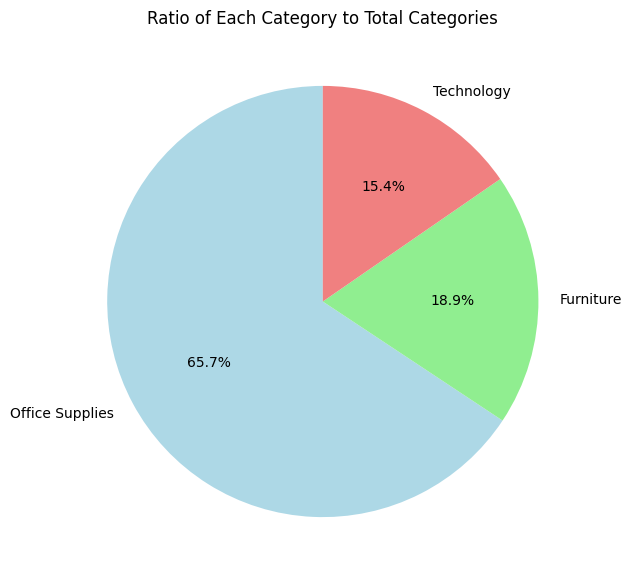

In [ ]:
# PLOTTING Category Freq. (Pie Chart)

category_counts = df1['Category'].value_counts()
plt.figure(figsize = (10, 7))
plt.pie(category_counts, labels = df1['Category'].unique(), \
        autopct = '%1.1f%%', startangle = 90, \
        colors = ['lightblue', 'lightgreen', 'lightcoral'])
plt.title('Ratio of Each Category to Total Categories')
plt.show()

# this visualizes the mode pretty much.
# only plotted Category bc not many value counts.

In [ ]:
# Number of Products in each Category

product_per_category = df1.groupby('Category')['Product Name'].count()
print(f'Num of Product in each {product_per_category}: ')

Num of Product in each Category
Furniture          1238
Office Supplies    5286
Technology         1523
Name: Product Name, dtype: int64: 


In [ ]:
# Number of Products in each Sub-Category

product_per_subcategory = df1.groupby('Sub-Category')['Product Name'].count()
print(f'Num of Product in each {product_per_subcategory}: ')

Num of Product in each Sub-Category
Accessories     368
Appliances      235
Art            1152
Binders        1059
Bookcases       391
Chairs          383
Copiers         367
Envelopes       346
Fasteners       350
Furnishings     389
Labels          372
Machines        335
Paper           374
Phones          453
Storage        1051
Supplies        347
Tables           75
Name: Product Name, dtype: int64: 


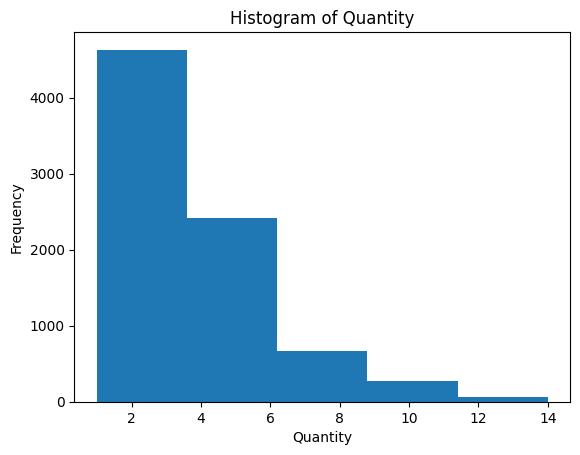

In [ ]:
plt.hist(df1['Quantity'], bins = 5) # out of experimenting
plt.xlabel('Quantity')
plt.ylabel('Frequency')
plt.title('Histogram of Quantity')
plt.show()

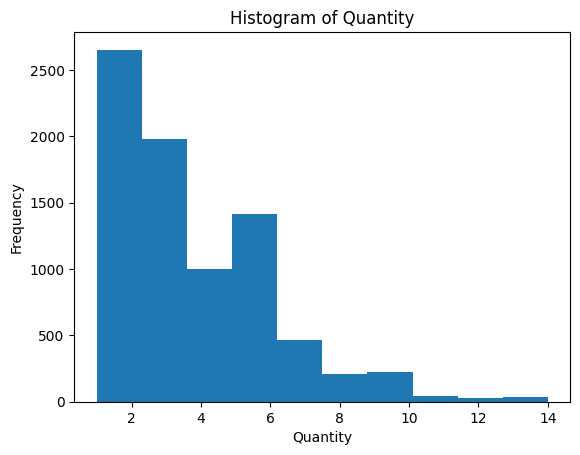

' could be a bad sign.\ncompany should focus on increasing hm each customer buys. '

In [ ]:
plt.hist(df1['Quantity'], bins = 10) # out of experimenting
plt.xlabel('Quantity')
plt.ylabel('Frequency')
plt.title('Histogram of Quantity')
plt.show()

# Most people not buying in bulk.
''' could be a bad sign.
company should focus on increasing hm each customer buys. '''

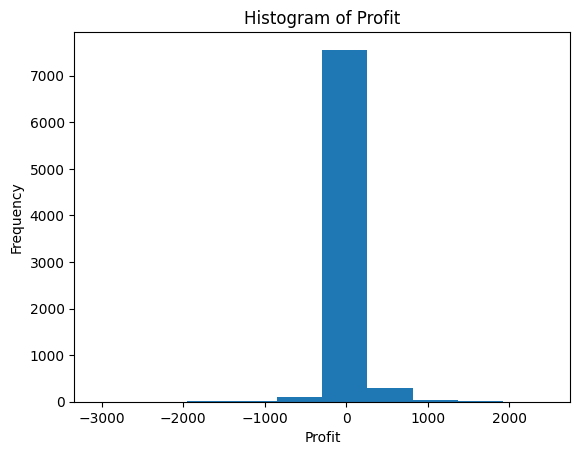

' really bad sign.\ncompany aint winning money often times. '

In [ ]:
plt.hist(df1['Profit'], bins = 10)
plt.xlabel('Profit')
plt.ylabel('Frequency')
plt.title('Histogram of Profit')
plt.show()

# Losing money...
''' really bad sign.
company aint winning money often times. '''

In [ ]:
df1['Profit'].describe()

# Profit can go UP TO 2.5K and DOWN TO -3k.
''' profit is NOT stable.
mean is also very, very low. indicates low profit overall.
we can also see the percentiles - 75th is ONLY at 45. '''

' profit is NOT stable.\nmean is also very, very low. indicates low profit overall.\nwe can also see the percentiles - 75th is ONLY at 45. '

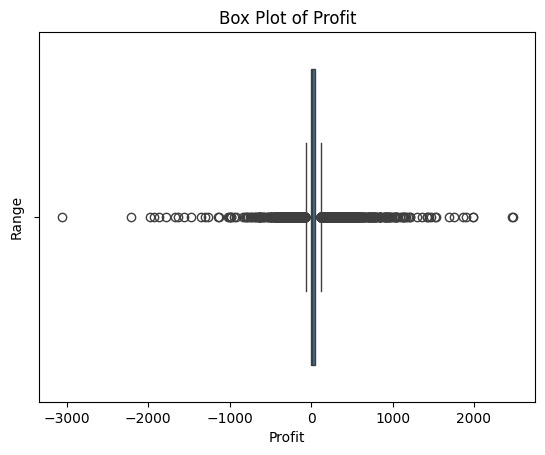

' basically 0 profit.\nhorrible marketing. '

In [ ]:
sns.boxplot(x = df1['Profit'])
plt.xlabel('Profit')
plt.ylabel('Range')
plt.title('Box Plot of Profit')
plt.show()

# Insight.
''' basically 0 profit.
horrible marketing. '''

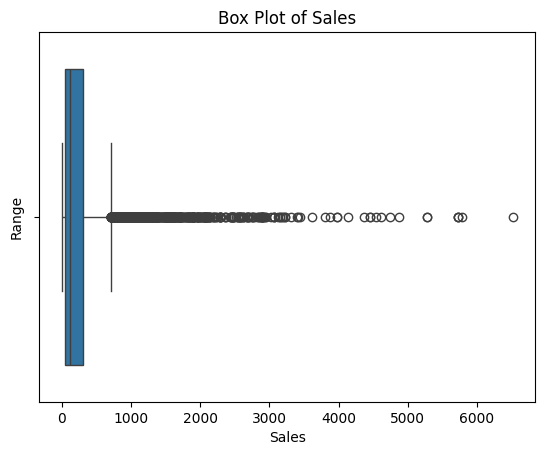

In [ ]:
sns.boxplot(x = df1['Sales'])
plt.xlabel('Sales')
plt.ylabel('Range')
plt.title('Box Plot of Sales')
plt.show()

In [ ]:
df1['Sales'].describe()

count    8047.000000
mean      291.845657
std       485.212156
min         3.000000
25%        48.000000
50%       117.000000
75%       313.000000
max      6517.000000
Name: Sales, dtype: float64

In [ ]:
# LABEL ENCODING FOR HEATMAP

In [ ]:
df1.info()

# encode: product name, category, sub
# drop: order ID

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8047 entries, 0 to 8046
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Order ID      8047 non-null   object 
 1   Product Name  8047 non-null   object 
 2   Discount      8047 non-null   float64
 3   Sales         8047 non-null   int64  
 4   Profit        8047 non-null   int64  
 5   Quantity      8047 non-null   int64  
 6   Category      8047 non-null   object 
 7   Sub-Category  8047 non-null   object 
dtypes: float64(1), int64(3), object(4)
memory usage: 503.1+ KB


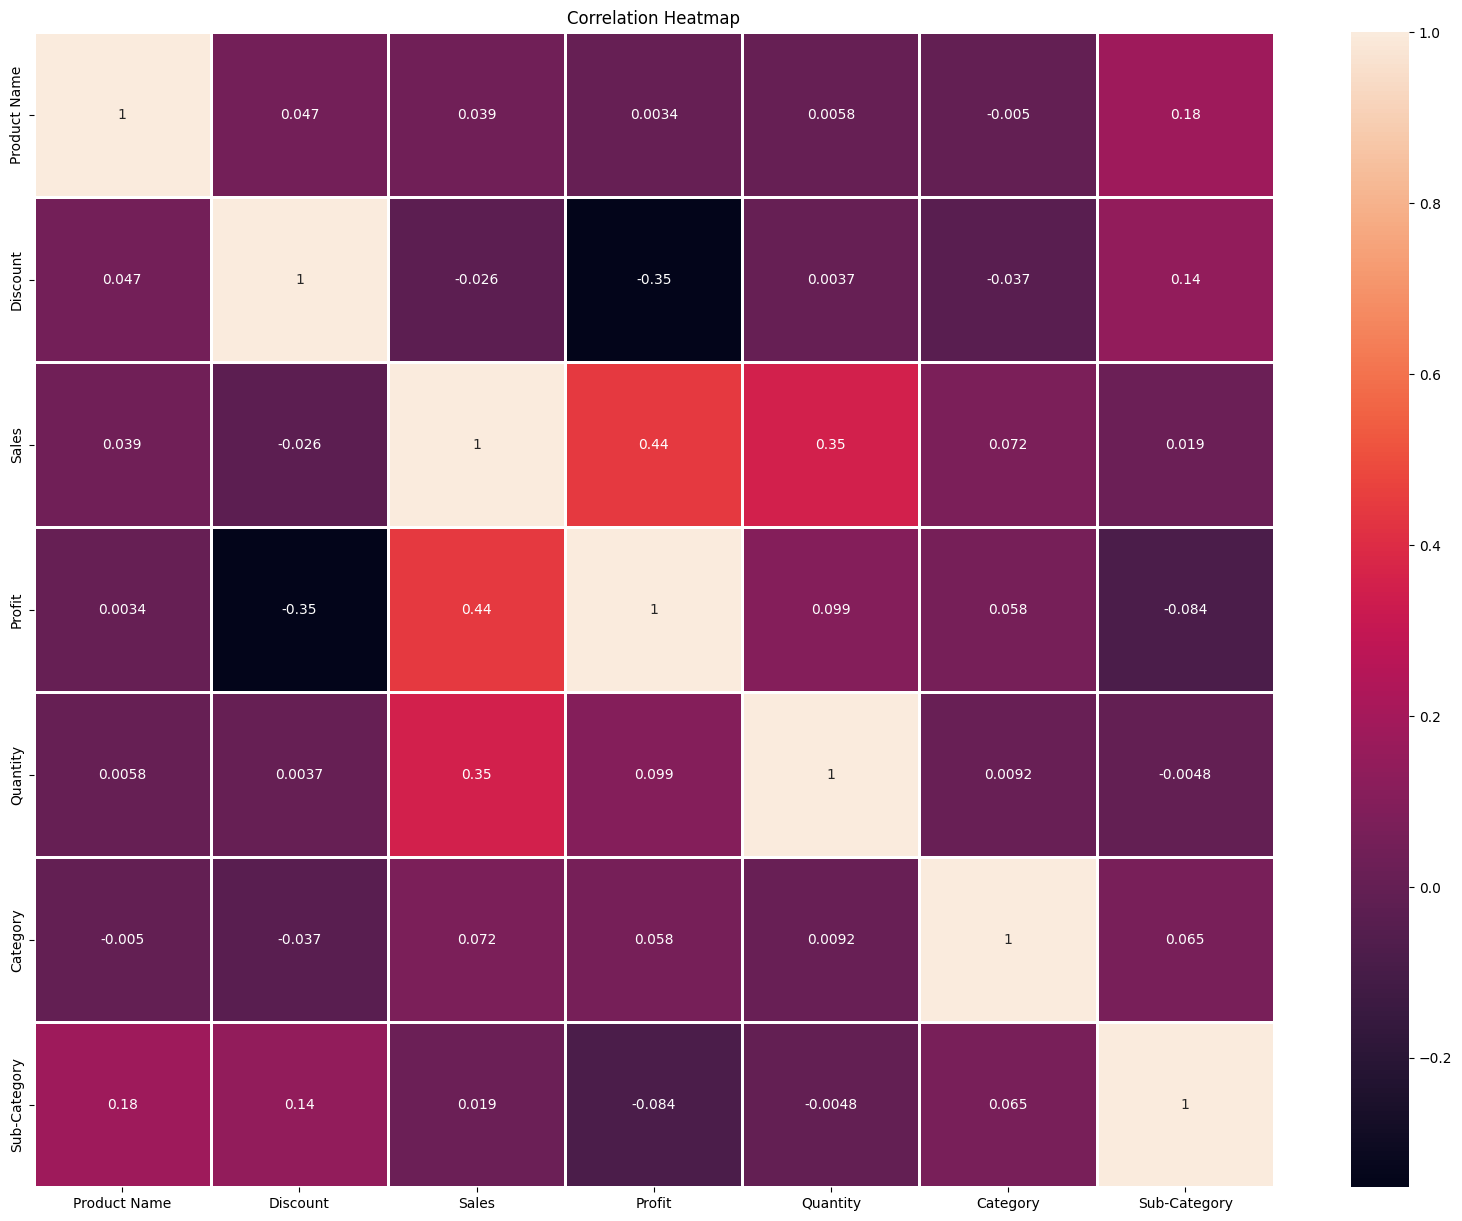

In [ ]:
# Heatmap.
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt

# copying df to keep og one as is
df1copy = df1.copy()
df1copy.drop(columns = ['Order ID'], inplace = True)

# label encoding the categorical columns.
lbl = LabelEncoder()
cols = ['Product Name', 'Category', 'Sub-Category']
for c in cols:
  df1copy[c] = lbl.fit_transform(df1copy[c])

# Correlation
corr = df1copy.corr()

# Plotting
plt.figure(figsize = (20, 15))
sns.heatmap(corr, annot = True, linewidth = 2)
  # linewidth just breaks apart the squares.
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
# INSIGHTS

''' discount & profit > -0.35 (uh oh)
sales & profit > 0.44 (should be higher..)
sales & quantity > 0.35
'''

# so lowk the label encoding was useless.
# but at least we checked it ig

' discount & profit > -0.35 (uh oh)\nsales & profit > 0.44 (should be higher..)\nsales & quantity > 0.35\n'

In [ ]:
pd.set_option('display.max_rows', 20)

In [ ]:
grouped = df1.groupby(['Discount', 'Profit']).count()
grouped

Order ID  Product Name  Sales  Quantity  Category  \
Discount Profit                                                      
0.00      0           147           147    147       147       147   
          1           138           138    138       138       138   
          2           137           137    137       137       137   
          3           146           146    146       146       146   
          4           152           152    152       152       152   
...                   ...           ...    ...       ...       ...   
0.70     -396           1             1      1         1         1   
0.80     -271           1             1      1         1         1   
         -114           1             1      1         1         1   
         -41            1             1      1         1         1   
0.85     -1925          1             1      1         1         1   

                 Sub-Category  
Discount Profit                
0.00      0               147  
          1               138  
          2               137  
          3               146  
          4               152  
...                       ...  
0.70     -396               1  
0.80     -271               1  
         -114               1  
         -41                1  
0.85     -1925              1  

[1598 rows x 6 columns]

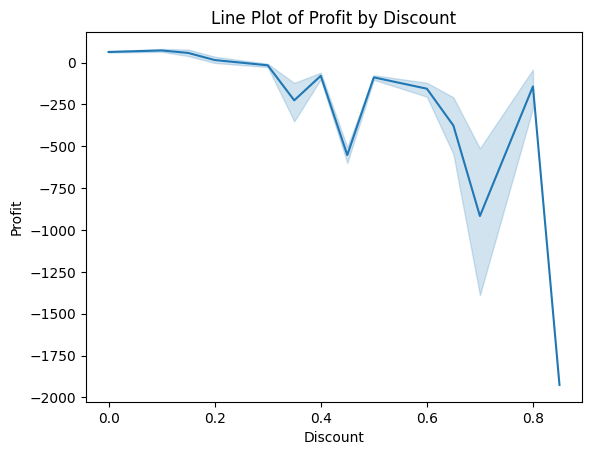

In [ ]:
sns.lineplot(df1, x = 'Discount', y = 'Profit')
plt.title('Line Plot of Profit by Discount')
plt.show()

# OBSERVATION:
# the higher the discount, the lower the profit.

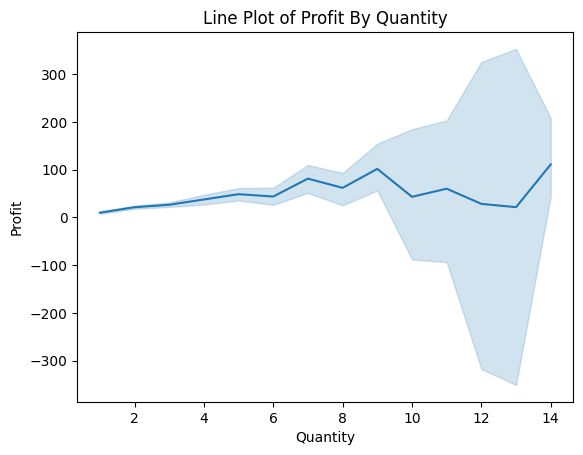

" profit should be higher as quantity is higher\nbut clearly not (from here & from heatmap at 0.099)\nso there's something wrong with their pricing "

In [ ]:
sns.lineplot(df1, x = 'Quantity', y = 'Profit')
plt.title('Line Plot of Profit By Quantity')
plt.show()

# INSIGHT
''' profit should be higher as quantity is higher
but clearly not (from here & from heatmap at 0.099)
so there's something wrong with their pricing '''

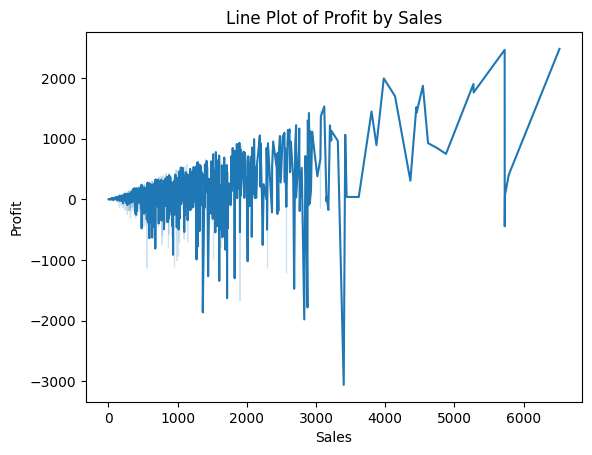

" The graph should be more linear\nbut it's all over the place. "

In [ ]:
sns.lineplot(df1, x = 'Sales', y = 'Profit')
plt.title('Line Plot of Profit by Sales')
plt.show()

# OBSERVATION
''' The graph should be more linear
but it's all over the place. '''

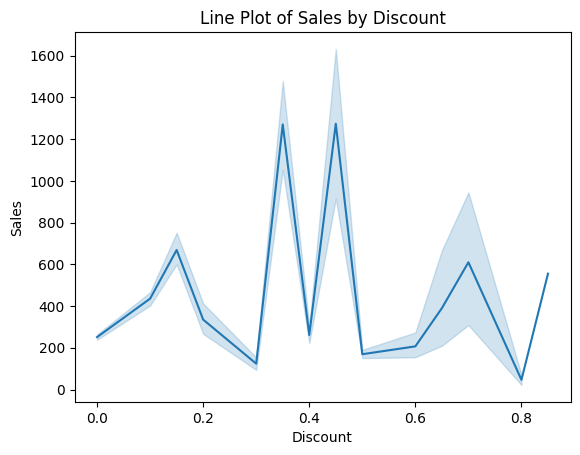

In [ ]:
sns.lineplot(df1, x = 'Discount', y = 'Sales')
plt.title('Line Plot of Sales by Discount')
plt.show()

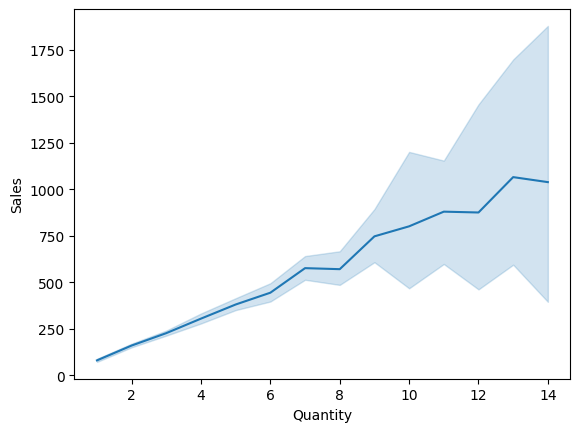

" There's a small increase in sales as quantity goes ^^\nBUT it should go up faster. "

In [ ]:
sns.lineplot(df1, x = 'Quantity', y = 'Sales')
plt.show()

# OBSERVATION
''' There's a small increase in sales as quantity goes ^^
BUT it should go up faster. '''

In [ ]:
df1.head()

,Order ID,Product Name,Discount,Sales,Profit,Quantity,Category,Sub-Category
0,BN-2011-7407039,"Enermax Note Cards, Premium",0.5,45,-26,3,Office Supplies,Paper
1,AZ-2011-9050313,"Dania Corner Shelving, Traditional",0.0,854,290,7,Furniture,Bookcases
2,AZ-2011-6674300,"Binney & Smith Sketch Pad, Easy-Erase",0.0,140,21,3,Office Supplies,Art
3,BN-2011-2819714,"Boston Markers, Easy-Erase",0.5,27,-22,2,Office Supplies,Art
4,BN-2011-2819714,"Eldon Folders, Single Width",0.5,17,-1,2,Office Supplies,Storage


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8047 entries, 0 to 8046
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Order ID      8047 non-null   object 
 1   Product Name  8047 non-null   object 
 2   Discount      8047 non-null   float64
 3   Sales         8047 non-null   int64  
 4   Profit        8047 non-null   int64  
 5   Quantity      8047 non-null   int64  
 6   Category      8047 non-null   object 
 7   Sub-Category  8047 non-null   object 
dtypes: float64(1), int64(3), object(4)
memory usage: 503.1+ KB


In [ ]:
pd.set_option('display.max_rows', None)

In [ ]:
# just shows profit (sum) per quantity.

profit_by_quantity = df1.groupby('Quantity')['Profit'].sum()
print(profit_by_quantity)

Quantity
1      6808
2     42315
3     52747
4     37767
5     45784
6     20811
7     38126
8     12792
9     18351
10     1862
11     2655
12      741
13      367
14     2114
Name: Profit, dtype: int64


In [ ]:
# just shows sales (sum) per quantity.

sales_by_quantity = df1.groupby('Quantity')['Sales'].sum()
print(sales_by_quantity)

Quantity
1      54779
2     315874
3     449398
4     305014
5     357264
6     210602
7     269708
8     117573
9     134493
10     34447
11     38718
12     22762
13     18115
14     19735
Name: Sales, dtype: int64


In [ ]:
# just shows profit (sum) per discount.

profit_by_discount = df1.groupby('Discount')['Profit'].sum()
print(profit_by_discount)

Discount
0.00    313169
0.10     95569
0.15     16649
0.20      1705
0.30      -635
0.35     -8330
0.40    -19268
0.45     -1104
0.50    -86458
0.60    -14949
0.65     -5260
0.70     -5497
0.80      -426
0.85     -1925
Name: Profit, dtype: int64


In [ ]:
df1['Category'].value_counts()

Category
Office Supplies    5286
Technology         1523
Furniture          1238
Name: count, dtype: int64

In [ ]:
# variance: how far numbers are spread out from their mean.

profit_var = df1['Profit'].var()
sales_var = df1['Sales'].var()

print(f'Variance\n\n\
Profit: {profit_var}\n\
Sales: {sales_var}')

# OBSERVATION
''' the closer to 0, closer to mean.
the numbers are SO dispersed, meaning the data is very dispersed. '''

Variance

Profit: 31728.816163836866
Sales: 235430.83672703253


' the closer to 0, closer to mean.\nthe numbers are SO dispersed, meaning the data is very dispersed. '

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8047 entries, 0 to 8046
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Order ID      8047 non-null   object 
 1   Product Name  8047 non-null   object 
 2   Discount      8047 non-null   float64
 3   Sales         8047 non-null   int64  
 4   Profit        8047 non-null   int64  
 5   Quantity      8047 non-null   int64  
 6   Category      8047 non-null   object 
 7   Sub-Category  8047 non-null   object 
dtypes: float64(1), int64(3), object(4)
memory usage: 503.1+ KB


In [ ]:
contingency0 = pd.crosstab(df1['Category'], df1['Sub-Category'], margins = True)
contingency0

# insight
''' just shows the frequency of combination between 2 columns '''

' just shows the frequency of combination between 2 columns '

In [ ]:
row_percent0 = contingency0.div(contingency0['All'], axis = 0) * 100
row_percent0

''' combination of a row / total '''

' combination of a row / total '

In [ ]:
col_percentage0 = contingency0.div(contingency0.loc['All'], axis = 1) * 100
col_percentage0

''' combination of a col / total '''

' combination of a col / total '

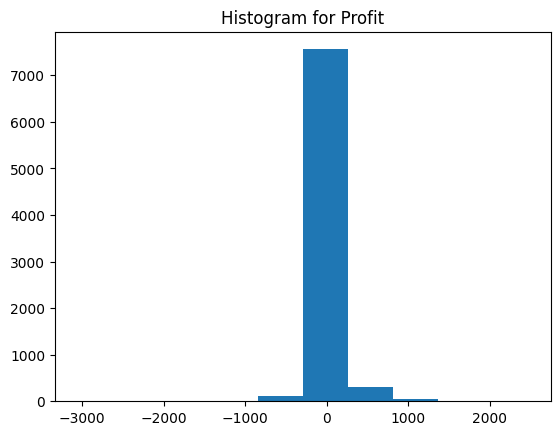

In [ ]:
plt.hist(df1['Profit'], bins = 10)
plt.title('Histogram for Profit')
plt.show()

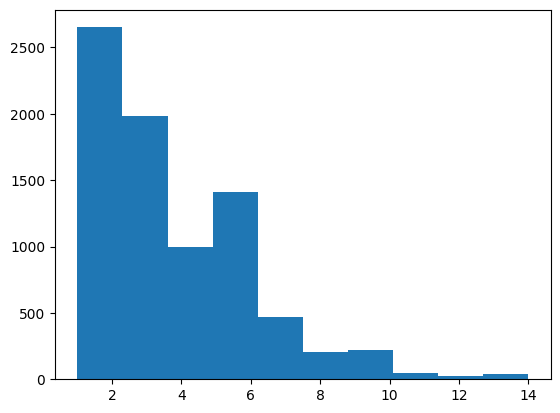

In [ ]:
plt.hist(df1['Quantity'], bins = 10)
plt.show()

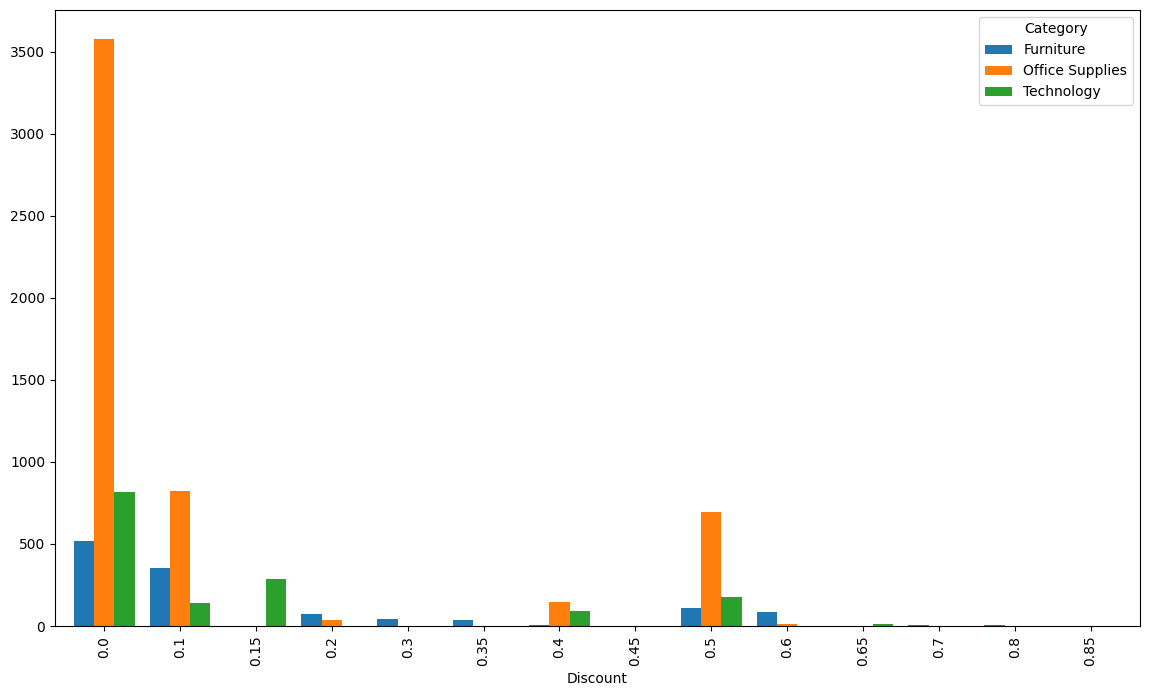

In [ ]:
grouped = df1.groupby(['Discount','Category']).count()
grouped = grouped['Order ID'].reset_index(name = 'Count')
pivot_table = grouped.pivot(index = 'Discount', columns = 'Category', values = 'Count')
pivot_table.plot(kind = 'bar', figsize=(14, 8), width = 0.8)
plt.show()

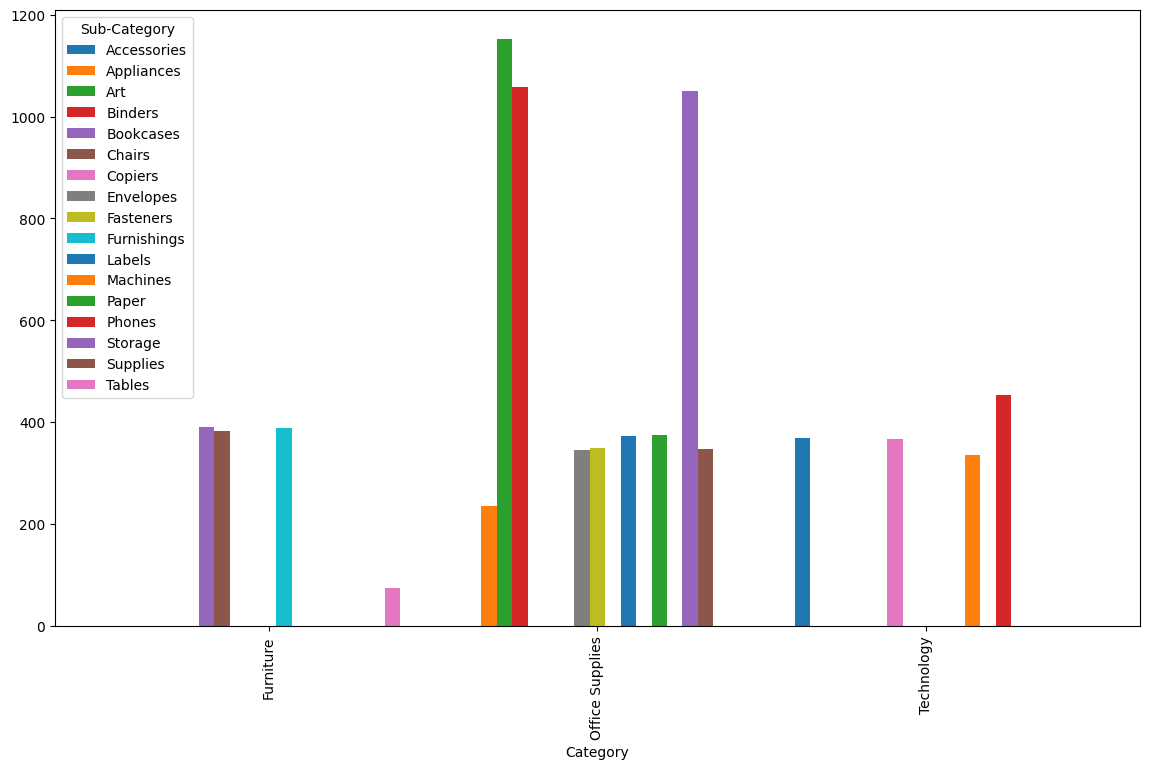

In [ ]:
grouped = df1.groupby(['Sub-Category','Category']).count()
grouped = grouped['Order ID'].reset_index(name = 'Count')
pivot_table = grouped.pivot(index = 'Category', columns = 'Sub-Category', values = 'Count')
pivot_table.plot(kind = 'bar', figsize=(14, 8), width = 0.8)
plt.show()

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8047 entries, 0 to 8046
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Order ID      8047 non-null   object 
 1   Product Name  8047 non-null   object 
 2   Discount      8047 non-null   float64
 3   Sales         8047 non-null   int64  
 4   Profit        8047 non-null   int64  
 5   Quantity      8047 non-null   int64  
 6   Category      8047 non-null   object 
 7   Sub-Category  8047 non-null   object 
dtypes: float64(1), int64(3), object(4)
memory usage: 503.1+ KB


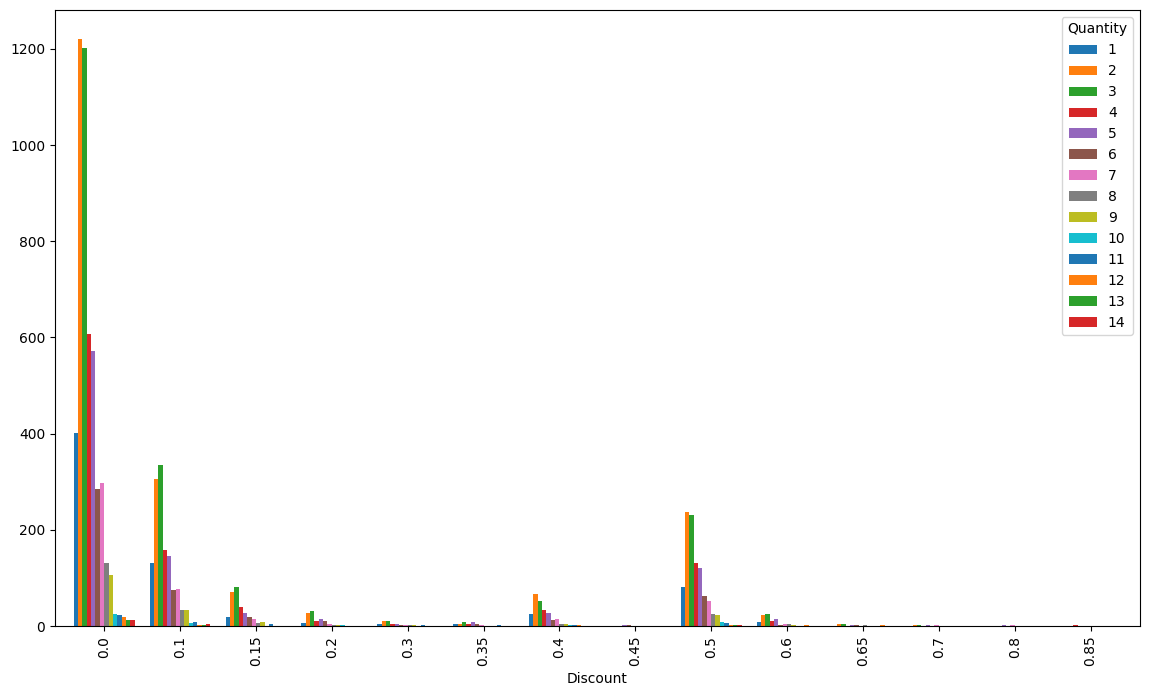

In [ ]:
grouped = df1.groupby(['Discount','Quantity']).count()
grouped = grouped['Order ID'].reset_index(name = 'Count')
pivot_table = grouped.pivot(index = 'Discount', columns = 'Quantity', values = 'Count')
pivot_table.plot(kind = 'bar', figsize=(14, 8), width = 0.8)
plt.show()

In [ ]:
sales_decile = np.percentile(df1['Sales'], np.arange(10, 101, 10))

sum = 10
for d in sales_decile:
  print(f'{sum}th Decile: {d}')
  sum+=10

10th Decile: 25.0
20th Decile: 41.0
30th Decile: 57.0
40th Decile: 85.0
50th Decile: 117.0
60th Decile: 166.0
70th Decile: 249.0
80th Decile: 397.0
90th Decile: 742.0
100th Decile: 6517.0


In [ ]:
profit_decile = np.percentile(df1['Profit'], np.arange(10, 101, 10))

sum = 10
for d in profit_decile:
  print(f'{sum}th Decile: {d}')
  sum+=10

10th Decile: -34.39999999999998
20th Decile: -3.0
30th Decile: 3.0
40th Decile: 8.0
50th Decile: 14.0
60th Decile: 23.0
70th Decile: 36.0
80th Decile: 64.0
90th Decile: 135.0
100th Decile: 2476.0


In [ ]:
# Z Scores
from scipy.stats import zscore, stats

sales_zscore = stats.zscore(df1['Sales'])
sales_zrange = sales_zscore.max() - sales_zscore.min()
sales_zrange

# sales is very dispersed.

<ipython-input-52-1847716a85f0>:4: DeprecationWarning: Please use `zscore` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  sales_zscore = stats.zscore(df1['Sales'])


13.42588947698871

In [ ]:
df1['salary_zscores'] = sales_zscore
low_sales_outlier = df1[(sales_zscore < -3 )]
high_sales_outlier = df1[(sales_zscore > 3 )]

In [ ]:
high_sales_outlier

,Order ID,Product Name,Discount,Sales,Profit,Quantity,Category,Sub-Category,salary_zscores
117,BN-2011-307477,"SAFCO Executive Leather Armchair, Black",0.10,4544,1868,11,Furniture,Chairs,8.764040
140,AZ-2011-8279503,"Bush Classic Bookcase, Mobile",0.00,2076,104,5,Furniture,Bookcases,3.677289
175,AZ-2011-823697,"Hoover Stove, Red",0.10,3070,1364,6,Office Supplies,Appliances,5.726004
225,AZ-2011-8060803,"Sauder Classic Bookcase, Pine",0.00,2624,446,6,Furniture,Bookcases,4.806762
238,AZ-2011-3089735,"Breville Microwave, White",0.10,1889,483,7,Office Supplies,Appliances,3.291866
280,BN-2011-1677989,"Panasonic Printer, Red",0.15,2017,0,9,Technology,Machines,3.555685
395,AZ-2011-8973571,"Tenex Lockers, Single Width",0.00,2859,171,14,Office Supplies,Storage,5.291116
409,BN-2011-6162681,"Hon Computer Table, Adjustable Height",0.35,2229,-754,7,Furniture,Tables,3.992634
428,AZ-2011-3020021,"KitchenAid Stove, Red",0.10,2053,410,4,Office Supplies,Appliances,3.629884
494,AZ-2011-4087409,"Ikea Classic Bookcase, Metal",0.00,2056,391,5,Furniture,Bookcases,3.636067


In [ ]:
low_sales_outlier

,Order ID,Product Name,Discount,Sales,Profit,Quantity,Category,Sub-Category,salary_zscores


<ipython-input-73-04f9e77e33d7>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df1['Sales'], shade = True)


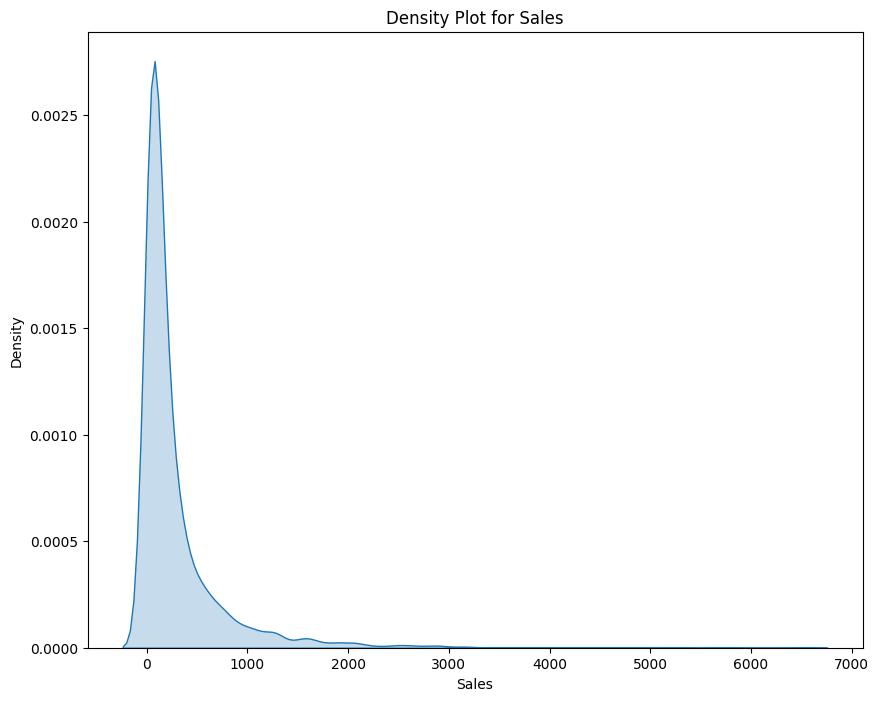

In [ ]:
plt.figure(figsize = [10, 8])
sns.kdeplot(df1['Sales'], shade = True)
plt.title('Density Plot for Sales')
plt.show()

In [ ]:
profit_zscore = stats.zscore(df1['Profit'])
profit_zrange = profit_zscore.max() - profit_zscore.min()
profit_zrange

<ipython-input-57-ae8b027305e0>:1: DeprecationWarning: Please use `zscore` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  profit_zscore = stats.zscore(df1['Profit'])


31.08108233371981

In [ ]:
df1['profit_zscore'] = profit_zscore
low_profit_outlier = df1[(profit_zscore < -3 )]
high_profit_outlier = df1[(profit_zscore > 3 )]

In [ ]:
high_profit_outlier

,Order ID,Product Name,Discount,Sales,Profit,Quantity,Category,Sub-Category,salary_zscores,profit_zscore
117,BN-2011-307477,"SAFCO Executive Leather Armchair, Black",0.10,4544,1868,11,Furniture,Chairs,8.764040,10.290004
175,AZ-2011-823697,"Hoover Stove, Red",0.10,3070,1364,6,Office Supplies,Appliances,5.726004,7.460368
527,BN-2011-5897988,"Ikea Library with Doors, Metal",0.00,1814,653,5,Furniture,Bookcases,3.137285,3.468560
711,AZ-2011-5059692,"Cisco Smart Phone, Cordless",0.10,5277,1759,9,Technology,Phones,10.274813,9.678039
750,AZ-2011-7213826,"Nokia Smart Phone, Cordless",0.00,4453,1425,7,Technology,Phones,8.576481,7.802844
868,AZ-2011-5313166,"Hamilton Beach Stove, Silver",0.00,6517,2476,12,Office Supplies,Appliances,12.830555,13.703533
877,AZ-2011-3755505,"Brother Fax Machine, Laser",0.00,1593,653,5,Technology,Copiers,2.681786,3.468560
909,AZ-2011-5376119,"Hon Training Table, Adjustable Height",0.00,1674,686,5,Furniture,Tables,2.848734,3.653834
1098,BN-2011-7628560,"Brother Fax Machine, Laser",0.00,1593,653,5,Technology,Copiers,2.681786,3.468560
1130,AZ-2011-9431896,"Cisco Smart Phone, with Caller ID",0.15,4449,1518,8,Technology,Phones,8.568237,8.324979


In [ ]:
low_profit_outlier

,Order ID,Product Name,Discount,Sales,Profit,Quantity,Category,Sub-Category,salary_zscores,profit_zscore
10,BN-2011-3248724,"Ikea Classic Bookcase, Metal",0.60,987,-1012,6,Furniture,Bookcases,1.432770,-5.879345
113,BN-2011-493873,"Sauder Classic Bookcase, Pine",0.50,875,-577,4,Furniture,Bookcases,1.201929,-3.437100
114,BN-2011-493873,"Barricks Coffee Table, Fully Assembled",0.70,273,-500,3,Furniture,Tables,-0.038842,-3.004794
128,AZ-2011-2270958,"Barricks Round Table, with Bottom Storage",0.50,1003,-943,4,Furniture,Tables,1.465748,-5.491954
409,BN-2011-6162681,"Hon Computer Table, Adjustable Height",0.35,2229,-754,7,Furniture,Tables,3.992634,-4.430841
752,BN-2011-2476139,"Dania Classic Bookcase, Pine",0.50,1648,-627,8,Furniture,Bookcases,2.795146,-3.717817
1253,BN-2011-2010578,"HP Wireless Fax, Laser",0.50,1441,-1268,8,Technology,Copiers,2.368502,-7.316620
1441,BN-2011-6627390,"Safco Classic Bookcase, Traditional",0.50,1314,-631,6,Furniture,Bookcases,2.106744,-3.740275
1488,AZ-2012-5999614,"Breville Refrigerator, White",0.50,1294,-776,5,Office Supplies,Appliances,2.065522,-4.554357
1523,BN-2012-1321856,"Lesro Training Table, Rectangular",0.70,240,-535,3,Furniture,Tables,-0.106858,-3.201297


In [ ]:
print(low_profit_outlier.shape[0], high_profit_outlier.shape[0])

55 107


<ipython-input-72-4573a81e8808>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df1['Profit'], shade = True)


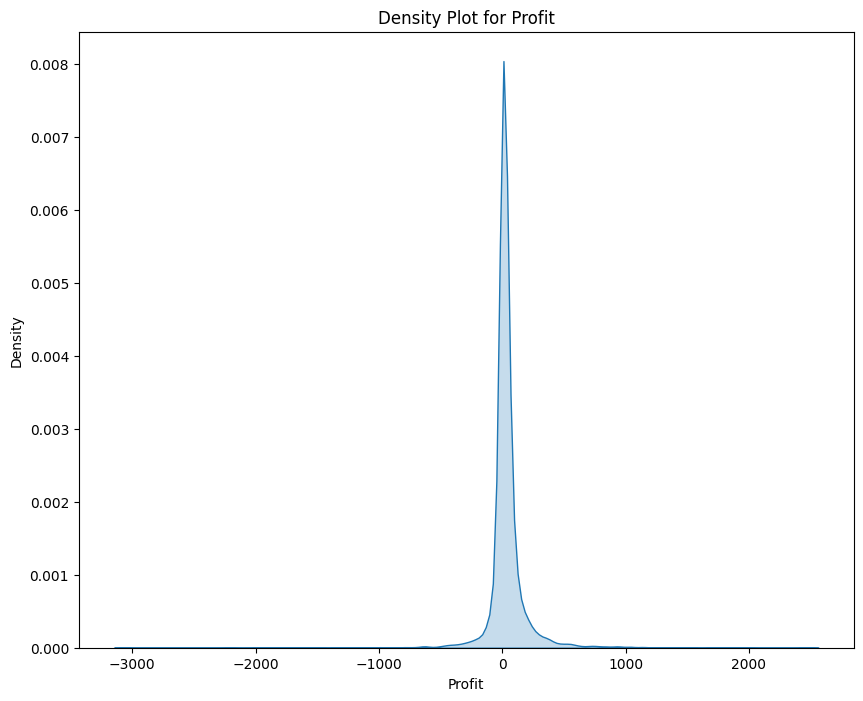

In [ ]:
plt.figure(figsize = [10, 8])
sns.kdeplot(df1['Profit'], shade = True)
plt.title('Density Plot for Profit')
plt.show()